In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Step 1: Reading and Understanding the Data

In [3]:
bike_sharing = pd.read_csv("day.csv")

In [4]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing.shape

(730, 16)

In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Dropping unnecessary variables

In [8]:
bike_sharing.drop(["casual" , "registered" , "dteday" , "instant"] , axis = 1 , inplace = True)

In [9]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 3: Visualising the Data

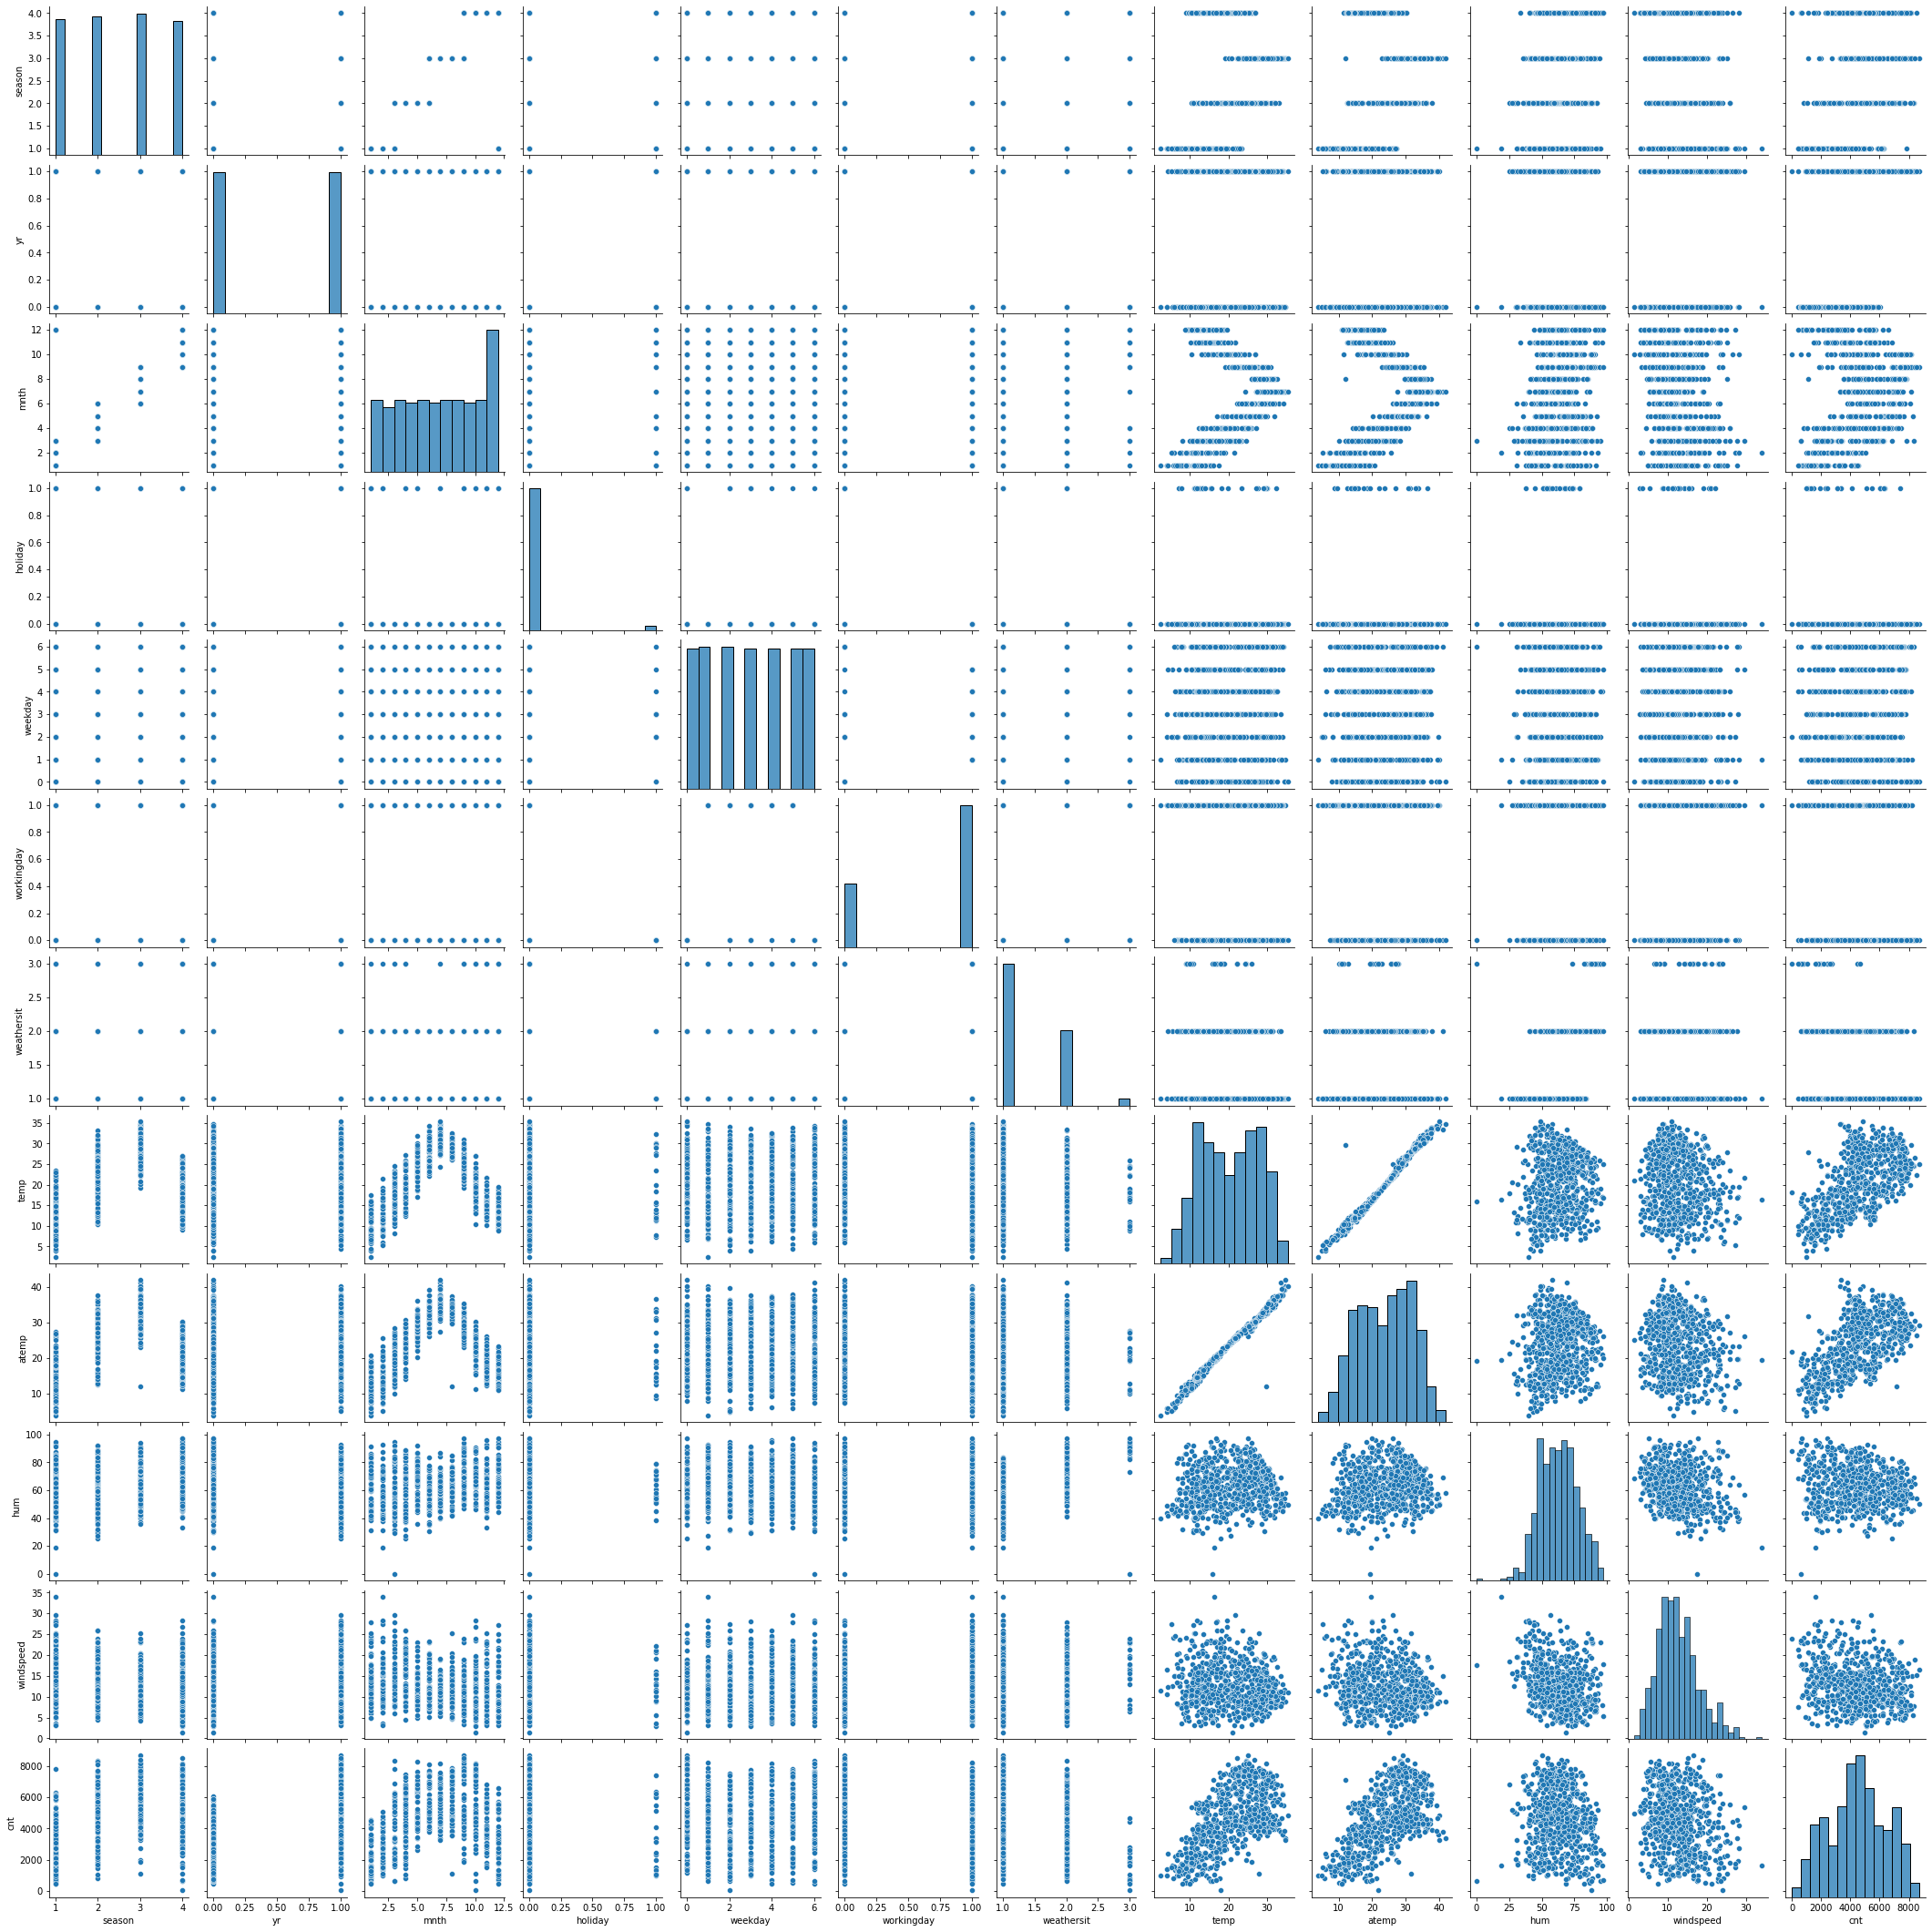

In [12]:
sns.pairplot(bike_sharing)
plt.show()

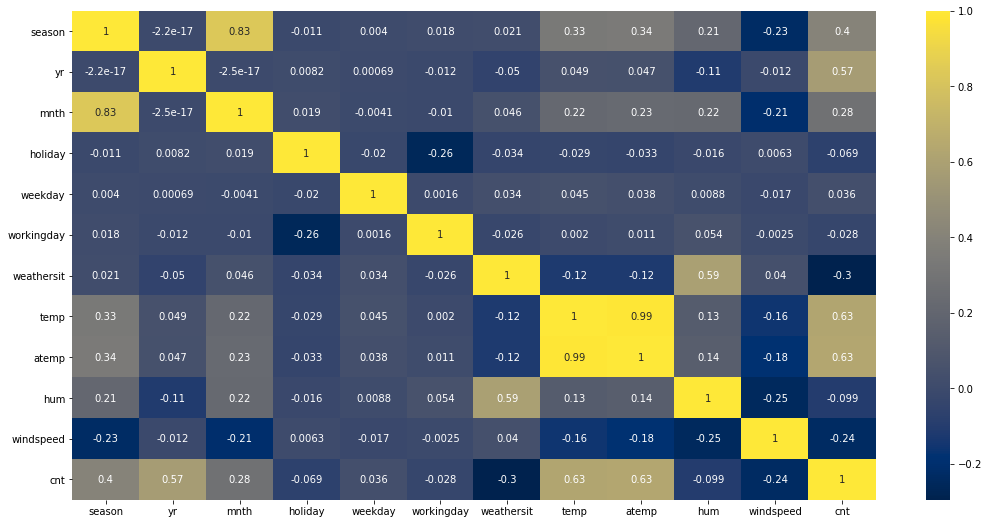

In [13]:
corr = bike_sharing.corr()
plt.figure(figsize = (18,9))

sns.heatmap(corr, annot = True , cmap = 'cividis')

plt.show()

## Step 3: Dummyfying some columns

In [14]:
bike_sharing.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike_sharing.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_sharing.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike_sharing.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [15]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
cat_cols = ['mnth', 'season', 'weekday' , 'weathersit']

In [17]:
dummies_vars= pd.get_dummies(bike_sharing[cat_cols] , drop_first = True )
bike_sharing = pd.concat([bike_sharing,dummies_vars] , axis = 1)

In [18]:
bike_sharing.drop(['season', 'mnth' , 'weekday' , 'weathersit'] , axis=1 , inplace = True)

In [19]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rainsnow,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike_sharing.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [21]:
bike_train, bike_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

In [25]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


In [24]:
scaler = MinMaxScaler()

In [26]:
num_vars = ['temp' ,'atemp', 'hum', 'windspeed' , 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [27]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rainsnow,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1


In [28]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rainsnow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [29]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a linear model

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light_rainsnow', True, 1),
 ('weathersit_Misty', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [35]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Light_rainsnow',
       'weathersit_Misty'],
      dtype='object')

In [37]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [38]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        16:48:34   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
10,season_Spring,4.37
12,season_Winter,4.06
11,season_Summer,2.82
14,weathersit_Misty,2.32
0,yr,2.09
8,mnth_Nov,1.85
6,mnth_Jan,1.75


In [40]:
X_train_2 = X_train_rfe.drop(['hum'],axis=1)

In [41]:
X_train_2.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [42]:
lm2 = sm.OLS(y_train,X_train_2).fit() 

In [43]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          4.75e-186
Time:                        16:49:03   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
11,season_Winter,2.95
9,season_Spring,2.89
10,season_Summer,2.24
0,yr,2.07
7,mnth_Nov,1.81
5,mnth_Jan,1.66
6,mnth_Jul,1.59
13,weathersit_Misty,1.57


In [45]:
X_train_3 = X_train_2.drop(['mnth_Nov'], axis=1)

In [46]:
X_train_3.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [47]:
lm3 = sm.OLS(y_train,X_train_3).fit() 

In [48]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          2.74e-186
Time:                        16:49:33   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
8,season_Spring,2.89
9,season_Summer,2.24
0,yr,2.07
10,season_Winter,2.05
5,mnth_Jan,1.65
6,mnth_Jul,1.59
12,weathersit_Misty,1.57
7,mnth_Sep,1.34


In [50]:
X_train_4 = X_train_3.drop(['mnth_Dec'], axis=1)

In [51]:
X_train_4.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'mnth_Jan', 'mnth_Jul',
       'mnth_Sep', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [52]:
lm4 = sm.OLS(y_train,X_train_4).fit() 

In [53]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          8.14e-187
Time:                        16:49:51   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
7,season_Spring,2.75
8,season_Summer,2.24
0,yr,2.07
9,season_Winter,1.78
4,mnth_Jan,1.61
5,mnth_Jul,1.59
11,weathersit_Misty,1.56
6,mnth_Sep,1.34


In [55]:
X_train_5 = X_train_4.drop(['mnth_Jan'], axis=1)

In [56]:
X_train_5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'mnth_Jul', 'mnth_Sep',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [57]:
lm5 = sm.OLS(y_train,X_train_5).fit() 

In [58]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          5.06e-187
Time:                        16:50:10   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,season_Summer,2.23
6,season_Spring,2.08
0,yr,2.07
8,season_Winter,1.78
4,mnth_Jul,1.58
10,weathersit_Misty,1.55
5,mnth_Sep,1.34
9,weathersit_Light_rainsnow,1.08


## Step 6: Residual Analysis:

In [60]:
y_train_cnt = lm5.predict(X_train_5)

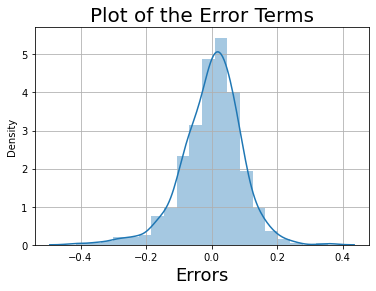

In [61]:
sns.distplot((y_train - y_train_cnt), bins = 20) 
plt.title('Plot of the Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 
plt.grid()
plt.show()

#### Inference:
- Error terms are normally distributed with mean 0

## Step 7: Making Predictions

In [62]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed' , 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [63]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [64]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_5.drop(['const'] , axis = 1).columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
y_pred = lm5.predict(X_test_new)

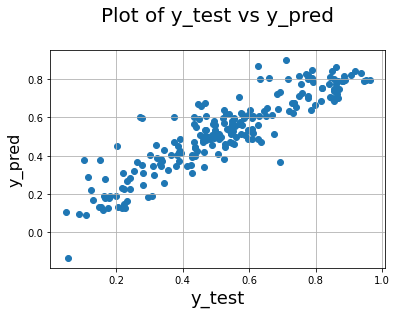

In [66]:
plt.scatter(y_test,y_pred)
plt.title('Plot of y_test vs y_pred\n', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

plt.grid()
plt.show()

In [67]:
from sklearn.metrics import r2_score 
r2 = round(r2_score(y_test, y_pred),3)
r2

0.805

In [68]:
# Next calculate adjusted R-squared using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]    # No. of rows of test data
p =X_test.shape[1]    # No. of columns of test data

adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),3)
adjusted_r2

0.775

## Step 8: Checking R2 and adjusted R2

In [69]:
results = pd.DataFrame(index=["Train data","Test data"])
results["r_square"]=[0.835,0.805] 
results["Adjusted_r_square"]=[0.832,0.7756]
results

,r_square,Adjusted_r_square
Train data,0.835,0.8320
Test data,0.805,0.7756


In [70]:
round(lm5.params,3).sort_values()

weathersit_Light_rainsnow   -0.284
windspeed                   -0.148
holiday                     -0.097
weathersit_Misty            -0.080
season_Spring               -0.067
mnth_Jul                    -0.052
season_Summer                0.046
mnth_Sep                     0.077
season_Winter                0.082
const                        0.199
yr                           0.234
temp                         0.491
dtype: float64